# Números Aleatorios

En la unidad anterior se describió como primer paso de los experimentos de simulación, la selección de una fuente de números aleatorios y la obtención de los mismos. Por lo tanto, disponer de un buen generador de números aleatorios es fundamental en Simulación. De hecho, constituye también una parte fundamental en otras áreas, como la Informática (algoritmos aleatorizados, verificación de algoritmos, complejidad de algoritmos, criptografía, ...), la Estadística (métodos de muestreo y remuestreo, contrastes Montecarlo, Inferencia Bayesiana, ...), y, en general, en cualquier problema de cálculo científico que, de manera directa o indirecta, incluya algún elemento probabilístico incluyendo los juegos de video.

## ¿Porqué estudiar generadores de números aleatorios?

Actualmente existen multiples generadores de números aleatorios en diferentes entornos y compiladores lo cual supondría para un usuario de la Simulación que no es necesario su estudio. Sin embargo, estudios sobre algunos generadores comerciales sugieren que debemos actuar con cuidado con el uso de ellos. Incluso, el uso progresivo de modelos de simulación cada vez más detallados exige generadores de números aleatorios de mayor calidad.

## ¿Cómo generar números aleatorios?

El núcleo de un estudio de simulación es la capacidad de generar números aleatorios, que representan el valor de una variable aleatoria distribuida uniformemente en (0,1).
Dos de los métodos para la generación de números pseudoaleatorios son $\textbf{MidSquare}$ y $\textbf{Congruencial Mixto}$. 

## ¿Cómo determinar si un generador de numeros aleatorios es apropiado?

### Pruebas o contrastes empíricos

Normalmente, pasaremos un conjunto de pruebas cuando introduzcamos un nuevo generador, o cuando deseamos analizar si un generador del que desconozcamos su algoritmo subyacente es suficientemente bueno para nuestros propósitos.


### Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F_n(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$


## Ejemplo

In [3]:
!pip install scipy

In [2]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 100

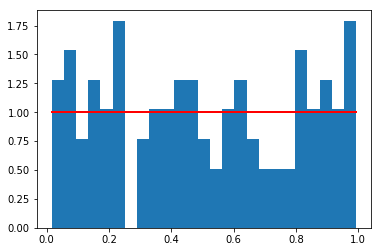

In [4]:
# Teoretical CDF for Uniform distribution F(x)
u = [1.0] * N
#print(u)

# Gerate random numbers with Uniform distribution f(x)
#np.random.seed(123456789)
x = np.random.uniform(0,1,N)

# Plot empirical distribution f(x)
count, bins, ignored = plt.hist(x, 25, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

De =  0.26513899520685846


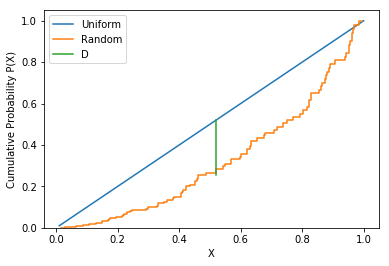

In [5]:
x1 = np.arange(1/N,1+1/N,1/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
#plt.title('arbitrary')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()


In [6]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print("D = ", D)
print("p-value = ", pvalue)


D =  0.26513899520685824
p-value =  1.07540233429404e-06


### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.


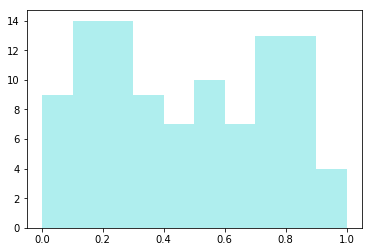

El generador propio  Sí  garantiza la uniformidad


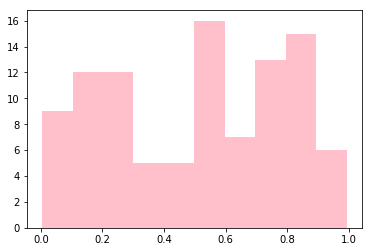

El generador numpy Sí  garantiza la uniformidad


In [9]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
k = 10 #grados de libertad
N = 100 #cantidad de números aleatorios generados

ei = N/k
grados = k-1
tabla = 16.92

def generador(N):
    a, c, m, xo = 22696467, 7, 2**32,86446194
    num=[]
    for i in range (N):
        xi = ((a*xo)+c)%m
        num.append(float(xi / m))
        xo=xi
    return num

def generador_numpy(N):
    aleatorio = []
    for i in range(N):
        aleatorio.append(np.random.rand())
    return aleatorio
    
def chi_cuadrado (x, color):
    frecuencias, separa, aux = plt.hist(x, k, density=False, color = color)
    plt.show()
    suma = 0
    for m in range(1,k+1):
        suma+=(frecuencias[m-1]-ei)**2/ei
    
    if suma<tabla:
        return "Sí"
    else:
        return "No"

if __name__ == "__main__":
    rta = chi_cuadrado(generador(N), 'paleturquoise')
    print("El generador propio ", rta, " garantiza la uniformidad")
    rta2 = chi_cuadrado(generador_numpy(N), 'pink')
    print("El generador numpy", rta, " garantiza la uniformidad")

### Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

In [10]:
import math
from math import *
N = 1000
Za2 = 1.96

def generador(N):
    a, c, m, xo = 22696467, 7, 2**32,86446194
    num=[]
    for i in range (N):
        xi = ((a*xo)+c)%m
        num.append(float(xi / m))
        xo=xi
    return num

def generador_numpy(N):
    aleatorio = []
    for i in range(N):
        aleatorio.append(np.random.rand())
    return aleatorio

def test_rachas(vector):
        sucesion = list()
        n1 = 0
        n2 = 0
        R = 0
        unos = False
        ceros = False
        for i in range (len(vector)-1):
            if (vector[i]<vector[i+1]):
                sucesion.append(1)
                n1 = n1 + 1
            else: 
                sucesion.append(0)
                n2 = n2 +1
        for j in range (len(sucesion)):
            if (sucesion[j]==1):
                if unos==False:
                    R+=1
                    unos = True
                    ceros = False
                else:
                    if ceros==False:
                        R+=1
                        ceros = True
                        unos = False
        n = n1+n2
        Z = ((R - ((2*n)-1))/3)/(math.sqrt((16*n-29)/90))
        
        if (fabs(Z)>Za2):
            print ("El generador garantiza aleatoriedad, con "+str(R)+" rachas.\n")
        else:
            print ("El generador no garantiza aleatoriedad.\n")
            

if __name__ == "__main__":
    print ("PARA EL GENERADOR PROPIO:")
    test_rachas(generador(N))
    print ("PARA EL GENERADOR NUMPY:")
    test_rachas(generador_numpy(N))

PARA EL GENERADOR PROPIO:
El generador garantiza aleatoriedad, con 497 rachas.

PARA EL GENERADOR NUMPY:
El generador garantiza aleatoriedad, con 512 rachas.



### Repetición de contrastes o pruebas

Para aumentar su potencia, los contrastes anteriores pueden repetirse $N$ veces. La distribución empírica de los valores del estadístico pueden compararse con su distribución teórica mediante, por ejemplo, el contraste de Kolmogorov-Smirnov.
Ya después tras la iteración de un test, se sacan los estadísticos para llegar a una estimación un tanto "más segura".

# T3: Taller 3. Ejercicios
* Tomando como base éste Notebook, implementar los contrastes o pruebas de Kolmogorov-Smirnov, $\chi^2$, pares consecutivos no solapados y rachas en la sección correspondiente para evaluar la calidad de cualquier secuencia de números obtenidas por un generador de números aleatorios $U(0,1)$ utilizando tanto el generador de numpy como el implementado por Ud previamente.
* Evaluar la calidad de los siguientes generadores de números aleatorios usando las pruebas implementadas en el punto anterior:
    * RANDU $x_{i+1}=65539 x_i \mod 2^31$
    * Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$
    * Numerical reciepes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$
    * Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$
* Elabore un reporte en $\LaTeX$ con formato de artículo científico usando OverLeaf (URL: https://www.overleaf.com/) describiendo la teoría principal, la metodología usada, presentando los resultados (incluyendo graficas), realizando un análisis y discusión de los resultados, finalizando con las principales conclusiones.

#### Pruebas de kolmogorov


********* PARA EL GENERADOR RANDUN ***********
Diferencia máxima =  0.2536582150399826
No garantiza uniformidad


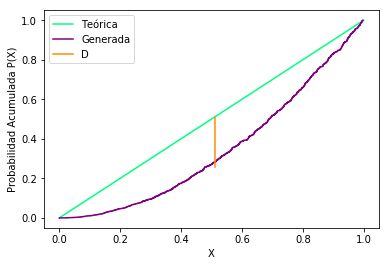


********* PARA EL GENERADOR SINCLAIR ZX81 ***********
Diferencia máxima =  0.25183974205448645
No garantiza uniformidad


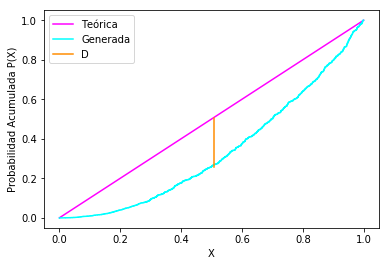


********* PARA EL GENERADOR NUMERICAL RECIEPES ***********
Diferencia máxima =  0.24894808856519574
No garantiza uniformidad


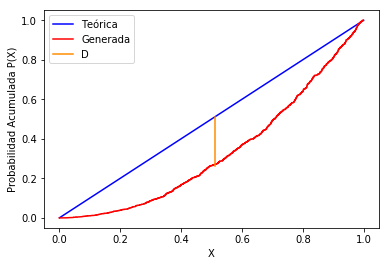


********* PARA EL GENERADOR BORLAND C/C++ ***********
Diferencia máxima =  0.25726585077769143
No garantiza uniformidad


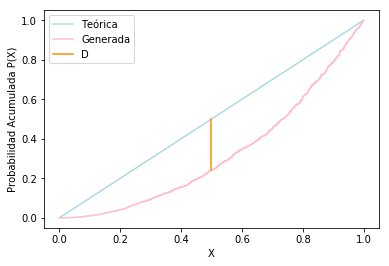

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generador(a, c, m, N):
    xo = 2389764784
    num=[]
    for i in range (N):
        xi = ((a*xo)+c)%m
        num.append(float(xi / m))
        xo=xi
    return num

N = 1000
calfa = 1.36/(N**0.5)

plt1 = plt
plt2 = plt
plt3 = plt
plt4 = plt 

u = [1.0]*N

xa = generador(65539, 0, 2**31, N)
xb = generador(75, 0, (2**16)+1, N)
xc = generador(1664525, 1013904223, 2**32, N)
xd = generador(22695477, 1, 2**32, N)

xu = np.arange(1/N,1+1/N,1/N) 
yu = np.cumsum(np.sort(u)/np.max(np.cumsum(u))) 

xa1 = np.sort(xa) 
ya2 = np.cumsum(np.sort(xa)/np.max(np.cumsum(xa))) 

xb1 = np.sort(xb)
yb2 = np.cumsum(np.sort(xb)/np.max(np.cumsum(xb)))

xc1 = np.sort(xc)
yc2 = np.cumsum(np.sort(xc)/np.max(np.cumsum(xc)))

xd1 = np.sort(xd)
yd2 = np.cumsum(np.sort(xd)/np.max(np.cumsum(xd)))

De1=np.absolute(ya2-yu)
print ("\n********* PARA EL GENERADOR RANDUN ***********")
print("Diferencia máxima = ",np.max(De1))
if np.max(De1)>calfa: print("No garantiza uniformidad")
else: print("Sí garantiza uniformidad")

plt1.plot(xu,yu,label='Teórica', color = 'springgreen')
plt1.step(xa1,ya2,label='Generada', color = 'purple') #De.argmax() devuelve la posición del valor + grande (resta de y2-y1 o De)
reca1 = [xu[De1.argmax()],xu[De1.argmax()]] #valores de x1[] usando De.argmax(), el mismo por ser recta
reca2 = [np.min([yu[De1.argmax()],ya2[De1.argmax()]]),np.max([yu[De1.argmax()],ya2[De1.argmax()]])]
plt1.step(reca1,reca2,label='D', color = 'darkorange') #escoge el mínimo y máximo de y1,y2 para formar pareja con los puntos x3
plt1.legend()
plt1.xlabel('X')
plt1.ylabel('Probabilidad Acumulada P(X)')
plt1.show()
#///////////////////////////////////////////////////////
De2=np.absolute(yb2-yu)
print ("\n********* PARA EL GENERADOR SINCLAIR ZX81 ***********")
print("Diferencia máxima = ",np.max(De2))
if np.max(De2)>calfa: print("No garantiza uniformidad")
else: print("Sí garantiza uniformidad")

plt2.plot(xu,yu,label='Teórica', color = 'magenta')
plt2.step(xb1,yb2,label='Generada', color = 'cyan') #De.argmax() devuelve la posición del valor + grande (resta de y2-y1 o De)
reca1 = [xu[De2.argmax()],xu[De2.argmax()]] #valores de x1[] usando De.argmax(), el mismo por ser recta
reca2 = [np.min([yu[De2.argmax()],yb2[De2.argmax()]]),np.max([yu[De2.argmax()],yb2[De2.argmax()]])]
plt2.step(reca1,reca2,label='D', color = 'darkorange') #escoge el mínimo y máximo de y1,y2 para formar pareja con los puntos x3
plt2.legend()
plt2.xlabel('X')
plt2.ylabel('Probabilidad Acumulada P(X)')
plt2.show()
#///////////////////////////////////////////////////////////
De3=np.absolute(yc2-yu)
print ("\n********* PARA EL GENERADOR NUMERICAL RECIEPES ***********")
print("Diferencia máxima = ",np.max(De3))
if np.max(De3)>calfa: print("No garantiza uniformidad")
else: print("Sí garantiza uniformidad")

plt3.plot(xu,yu,label='Teórica', color = 'blue')
plt3.step(xc1,yc2,label='Generada', color = 'red') #De.argmax() devuelve la posición del valor + grande (resta de y2-y1 o De)
reca1 = [xu[De3.argmax()],xu[De3.argmax()]] #valores de x1[] usando De.argmax(), el mismo por ser recta
reca2 = [np.min([yu[De3.argmax()],yc2[De3.argmax()]]),np.max([yu[De3.argmax()],yc2[De3.argmax()]])]
plt3.step(reca1,reca2,label='D', color = 'darkorange') #escoge el mínimo y máximo de y1,y2 para formar pareja con los puntos x3
plt3.legend()
plt3.xlabel('X')
plt3.ylabel('Probabilidad Acumulada P(X)')
plt3.show()
#/////////////////////////////////////////////////
De4=np.absolute(yd2-yu)
print ("\n********* PARA EL GENERADOR BORLAND C/C++ ***********")
print("Diferencia máxima = ",np.max(De4))
if np.max(De4)>calfa: print("No garantiza uniformidad")
else: print("Sí garantiza uniformidad")

plt4.plot(xu,yu,label='Teórica', color = 'lightblue')
plt4.step(xd1,yd2,label='Generada', color = 'pink') #De.argmax() devuelve la posición del valor + grande (resta de y2-y1 o De)
reca1 = [xu[De4.argmax()],xu[De4.argmax()]] #valores de x1[] usando De.argmax(), el mismo por ser recta
reca2 = [np.min([yu[De4.argmax()],yd2[De4.argmax()]]),np.max([yu[De4.argmax()],yd2[De4.argmax()]])]
plt4.step(reca1,reca2,label='D', color = 'darkorange') #escoge el mínimo y máximo de y1,y2 para formar pareja con los puntos x3
plt4.legend()
plt4.xlabel('X')
plt4.ylabel('Probabilidad Acumulada P(X)')
plt4.show()

#### Pruebas $\chi^{2}$

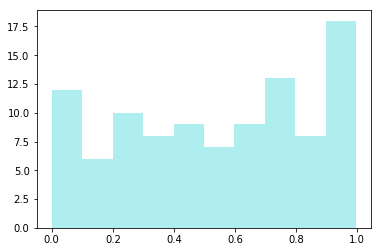

***El generador RANDU  Sí  garantiza la uniformidad 11.200000000000001


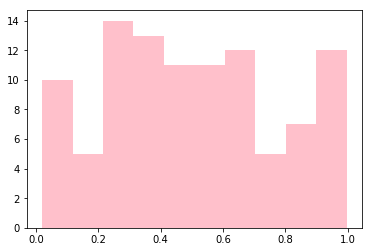

***El generador Sinclair ZX81  Sí  garantiza la uniformidad 9.4


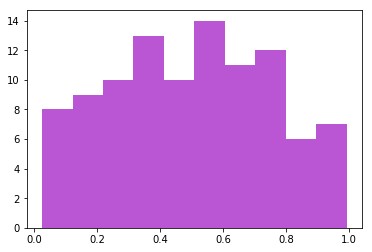

***El generador Numerical Reciepes  Sí  garantiza la uniformidad 6.0


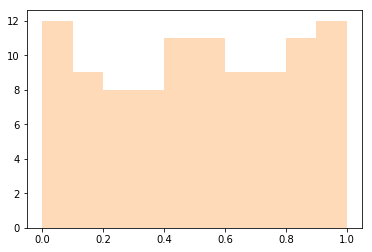

***El generador Borland C/C++  Sí  garantiza la uniformidad 2.2000000000000006


In [18]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
k = 10 #grados de libertad
N = 100 #cantidad de números aleatorios generados

ei = N/k
grados = k-1
tabla = 16.92

def generador(a, c, m, N):
    xo = 2389764784
    num=[]
    for i in range (N):
        xi = ((a*xo)+c)%m
        num.append(float(xi / m))
        xo=xi
    return num
    
def chi_cuadrado (x, color):
    frecuencias, separa, aux = plt.hist(x, k, density=False, color = color)
    plt.show()
    suma = 0
    for m in range(1,k+1):
        suma+=(frecuencias[m-1]-ei)**2/ei
    
    if suma<tabla:
        return ["Sí", suma]
    else:
        return ["No", suma]

if __name__ == "__main__":
    rta = chi_cuadrado(generador(65539, 0, 2**31, N), 'paleturquoise')
    print("***El generador RANDU ", rta[0], " garantiza la uniformidad", rta[1])
    rta2 = chi_cuadrado(generador(75, 0, (2**16)+1, N), 'pink')
    print("***El generador Sinclair ZX81 ", rta2[0], " garantiza la uniformidad", rta2[1])
    rta3 = chi_cuadrado(generador(1664525, 1013904223, 2**32, N), 'mediumorchid')
    print("***El generador Numerical Reciepes ", rta3[0], " garantiza la uniformidad", rta3[1])
    rta4 = chi_cuadrado(generador(22695477, 1, 2**32, N), 'peachpuff')
    print("***El generador Borland C/C++ ", rta4[0], " garantiza la uniformidad", rta4[1])

#### Test de rachas

In [20]:
import math
from math import *
N = 1000
Za2 = 1.96

def generador(a, c, m, N):
    xo = 86876876478626482
    num=[]
    for i in range (N):
        xi = ((a*xo)+c)%m
        num.append(float(xi / m))
        xo=xi
    return num

def test_rachas(vector):
        sucesion = list()
        n1 = 0
        n2 = 0
        R = 0
        unos = False
        ceros = False
        for i in range (len(vector)-1):
            if (vector[i]<vector[i+1]):
                sucesion.append(1)
                n1 = n1 + 1
            else: 
                sucesion.append(0)
                n2 = n2 +1
        for j in range (len(sucesion)):
            if (sucesion[j]==1):
                if unos==False:
                    R+=1
                    unos = True
                    ceros = False
                else:
                    if ceros==False:
                        R+=1
                        ceros = True
                        unos = False
        n = n1+n2
        Z = ((R - ((2*n)-1))/3)/(math.sqrt((16*n-29)/90))
        
        if (fabs(Z)>Za2):
            print ("El generador no garantiza aleatoriedad")
        else:
            print ("El generador sí garantiza aleatoriedad, con "+str(R)+" rachas.\n")
            

if __name__ == "__main__":
    print ("\n****PARA EL GENERADOR RANDUN****")
    test_rachas(generador(65539, 0, 2**31, N))
    print ("\n****PARA EL GENERADOR SINCLAIR ZX81****")
    test_rachas(generador(75, 0, (2**16)+1, N))
    print ("\n****PARA EL GENERADOR NUMERICAL RECIEPES****")
    test_rachas(generador(1664525, 1013904223, 2**32, N))
    print ("\n****PARA EL GENERADOR BORLAND C/C++****")
    test_rachas(generador(22695477, 1, 2**32, N))


****PARA EL GENERADOR RANDUN****
El generador no garantiza aleatoriedad

****PARA EL GENERADOR SINCLAIR ZX81****
El generador no garantiza aleatoriedad

****PARA EL GENERADOR NUMERICAL RECIEPES****
El generador no garantiza aleatoriedad

****PARA EL GENERADOR BORLAND C/C++****
El generador no garantiza aleatoriedad


## Conclusión

* La principal conclusión para esta implementación es que los 4 generadores de números aleatorios (RANDUN, Sinclair ZX81, Numerical Reciepes y Borland C/C++) mantienen el mismo criterio tras evaluar su calidad con las pruebas mencionadas anteriormente. Para las dos primeras pruebas que determinan la uniformidad de un generador aleatorio, se obtuvo como resultado que cada uno de los generadores evaluados SÍ garantizaba la uniformidad. Por otro lado, en el test de aleatoriedad se obtuvo que NO era aleatorio, lo que re afirma el resultado de las primeras pruebas. Si no es aleatorio, es uniforme. 


# Referencias

[Ríos, Ríos & Martín, 2000] David Ríos, Sixto Ríos, Jacinto Martín. Simulación, Métodos y aplicaciones. Editorial Alfaomega, 2000.